In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/raghu/Desktop/Article/Data.csv")

In [3]:
len(data)

5045

In [4]:
data.isna().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               34
Applicant_Gender                 22
Applicant_BirthDate              23
Applicant_Marital_Status         30
Applicant_Occupation           1004
Applicant_Qualification          44
Manager_DOJ                     824
Manager_Joining_Designation     824
Manager_Current_Designation     824
Manager_Grade                   824
Manager_Status                  824
Manager_Gender                  824
Manager_DoB                     824
Manager_Num_Application         824
Manager_Num_Coded               824
Manager_Business                824
Manager_Num_Products            824
Manager_Business2               824
Manager_Num_Products2           824
dtype: int64

In [5]:
data.dtypes[data.dtypes == 'object']

ID                             object
Application_Receipt_Date       object
Applicant_Gender               object
Applicant_BirthDate            object
Applicant_Marital_Status       object
Applicant_Occupation           object
Applicant_Qualification        object
Manager_DOJ                    object
Manager_Joining_Designation    object
Manager_Current_Designation    object
Manager_Status                 object
Manager_Gender                 object
Manager_DoB                    object
dtype: object

In [6]:
data['Applicant_Marital_Status'].value_counts()

M    4089
S     907
W      12
D       7
Name: Applicant_Marital_Status, dtype: int64

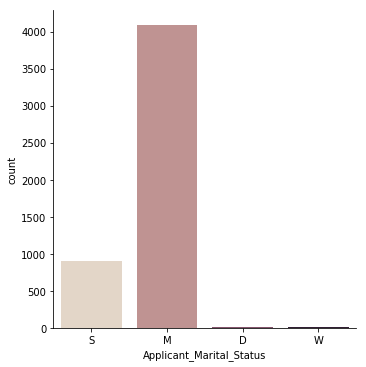

In [7]:
sns.catplot(x="Applicant_Marital_Status", kind="count", palette="ch:.20", data=data)

In [8]:
data['Applicant_Marital_Status'].replace(to_replace=['W','D'],value=np.NAN,inplace=True)

In [9]:
data['Applicant_Marital_Status'].value_counts()

M    4089
S     907
Name: Applicant_Marital_Status, dtype: int64

In [10]:
data['Applicant_Marital_Status'].isna().sum()

49

In [11]:
data['Applicant_Marital_Status'].mode().values[0]

'M'

In [12]:
data['Applicant_Marital_Status'].fillna(data['Applicant_Marital_Status'].mode().values[0],inplace=True)

In [13]:
data['Applicant_Marital_Status'].value_counts()

M    4138
S     907
Name: Applicant_Marital_Status, dtype: int64

In [15]:
data['Applicant_Occupation'].value_counts()

Salaried         2560
Business          646
Others            506
Self Employed     310
Student            19
Name: Applicant_Occupation, dtype: int64

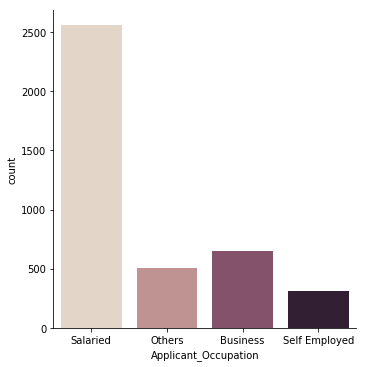

In [23]:
sns.catplot(x="Applicant_Occupation", kind="count", palette="ch:.20", data=data)

In [19]:
data['Applicant_Occupation'].replace(to_replace=['Student'],value=np.NAN,inplace=True)

In [20]:
data['Applicant_Occupation'].value_counts()

Salaried         2560
Business          646
Others            506
Self Employed     310
Name: Applicant_Occupation, dtype: int64

In [21]:
data['Applicant_Occupation'].isna().sum()

1023

In [24]:
data['Applicant_Occupation2'] = data['Applicant_Occupation'].fillna(data['Applicant_Occupation'].mode().values[0])

In [27]:
data['Applicant_Occupation2'].value_counts()

Salaried         3583
Business          646
Others            506
Self Employed     310
Name: Applicant_Occupation2, dtype: int64

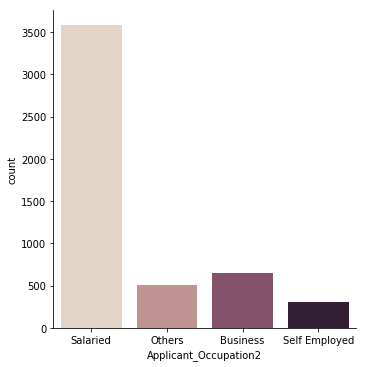

In [25]:
sns.catplot(x="Applicant_Occupation2", kind="count", palette="ch:.20", data=data)

In [32]:
def find_index_(df,to_find,col):
    min_=1
    max_=len(df)
    to_find=to_find
    while(min_<max_):
        mid=int((min_+max_)/2)
        if((df[1:mid][col].isna().sum()==to_find)and((df[col][(mid-1):mid].isna()).values)):
            return mid
        elif((df[1:mid][col].isna().sum()>to_find)or(df[1:mid][col].isna().sum()==to_find)):
            max_=mid-1
        else:
            min_=mid+1
        if(max_==min_):
            if((df[1:min_][col].isna().sum()==to_find)and((df[col][(min_-1):min_].isna()).values)):
                return min_

In [33]:
def replace_cat_list(df,col,cat_list):
    count_cat_dict_initial = {'Total_cat':0}
    for cat in cat_list:
        count_cat_dict_initial[cat] = df.loc[df[col]==cat,col].count()
        count_cat_dict_initial['Total_cat'] = count_cat_dict_initial.get('Total_cat') + count_cat_dict_initial[cat]
    count_cat_dict_initial['Total'] = len(df[col])
    count_cat_dict_final = {'Total_cat':0}
    for cat in cat_list[:-1]:
        count_cat_dict_final[cat] = int((count_cat_dict_initial.get(cat)/count_cat_dict_initial.get('Total_cat'))*count_cat_dict_initial.get('Total'))
        count_cat_dict_final['Total_cat'] = count_cat_dict_final.get('Total_cat') + count_cat_dict_final[cat]
    count_cat_dict_final[cat_list[-1]] = count_cat_dict_initial['Total'] - count_cat_dict_final['Total_cat']
    fill_dict = {}
    for cat in cat_list:
        fill_dict[cat] = count_cat_dict_final[cat] - count_cat_dict_initial[cat]
    for cat in cat_list[:-1]:
        fill_index = find_index_(df,fill_dict.get(cat),col)
        df.loc[0:fill_index,col] = df.loc[0:fill_index,col].fillna(cat)
    df.loc[:,col] = df.loc[:,col].fillna(cat_list[-1])
    return df

In [34]:
data = replace_cat_list(data,'Applicant_Occupation',['Salaried','Business','Others','Self Employed'])

In [36]:
data['Applicant_Occupation'].isna().sum()

0

In [37]:
data['Applicant_Occupation'].value_counts()

Salaried         3212
Business          810
Others            635
Self Employed     388
Name: Applicant_Occupation, dtype: int64